# Analysis and Visualization of Titanic Passenger Data

In this project I will analyze and visualize Titanic passenger data in order to understand what factors may have led to a passenger's survival. I will do so by prompting and answering questions surrounding this mystery throughout the project.

In [6]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titanic_df = pd.read_csv('train.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



First of all, who were the people on the Titanic? Can we describe them in meaningful, categorical ways?
In the following graphs, I will categorize the passengers by sex, class, adult/child classification, age, deck, and so on. I will also create graphs to try to find relationships between these categories.

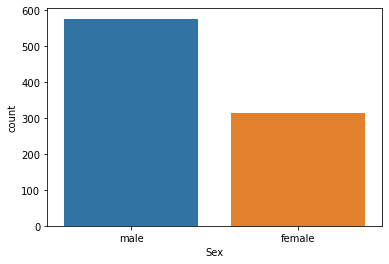

In [11]:
#categorized by sex
sns.countplot('Sex',data=titanic_df)

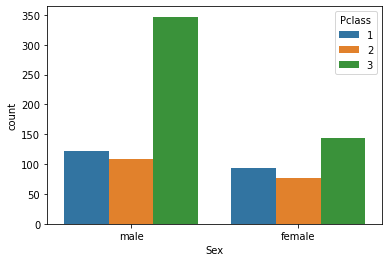

In [12]:
#categorized by sex, then class    
sns.countplot('Sex',data=titanic_df,hue='Pclass')

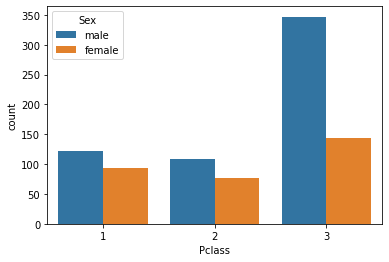

In [13]:
#categorized by class, then sex    
sns.countplot('Pclass',data=titanic_df,hue='Sex')

In [17]:
#categorized by adult male, adult female, and children under 16
  
def male_female_child(passenger):
        age,sex = passenger
        if age < 16:
            return 'child'
        else:
            return sex

In [18]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [19]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


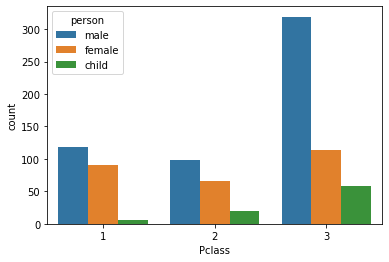

In [20]:
sns.countplot('Pclass',data=titanic_df,hue='person')

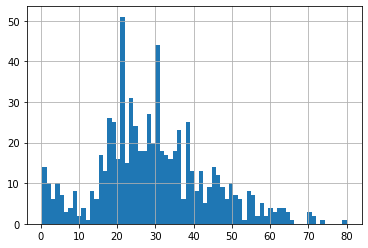

In [21]:
#info on age distribution
titanic_df['Age'].hist(bins=70)

In [22]:
titanic_df['Age'].mean()

29.69911764705882

In [24]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

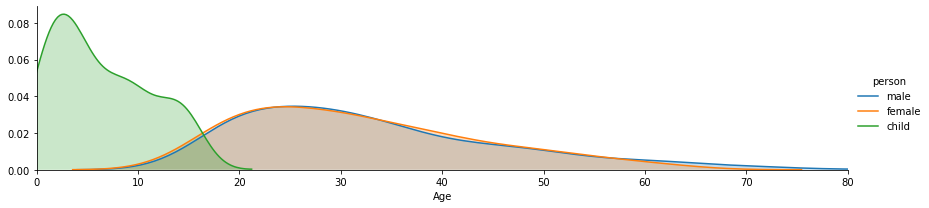

In [30]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

fig.set(xlim=(0,titanic_df['Age'].max()))

fig.add_legend()

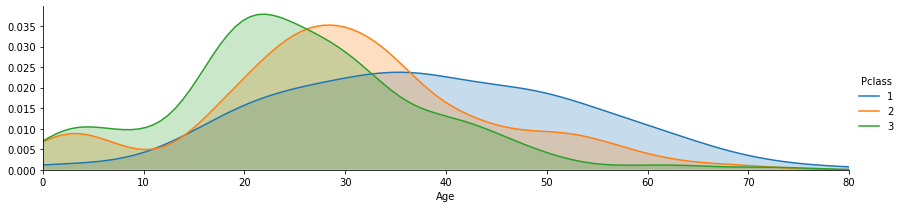

In [32]:
#info on age distribution relating to class

fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

fig.set(xlim=(0,titanic_df['Age'].max()))

fig.add_legend()

In [33]:
#How many people were on each deck?
    #We can obtain this info by looking at the existing cabin information
    
    #drop null values from the Cabin column
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

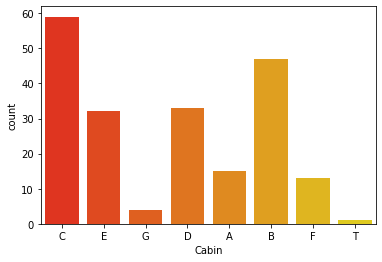

In [43]:
    #drop cabin numbers to obtain only decks
levels = []
for level in deck:
    levels.append(level[0])
    
    #plot counts
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data=cabin_df,palette='autumn')

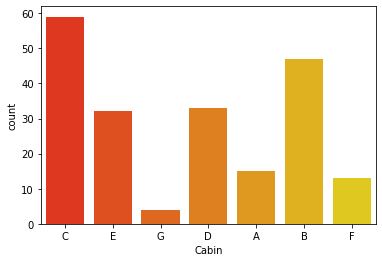

In [44]:
    #notice the outlier T cabin, plot again dropping that point
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot('Cabin',data=cabin_df,palette='autumn')

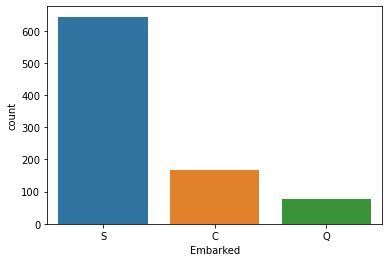

In [45]:
#How many people embarked from each place?

sns.countplot('Embarked',data=titanic_df)

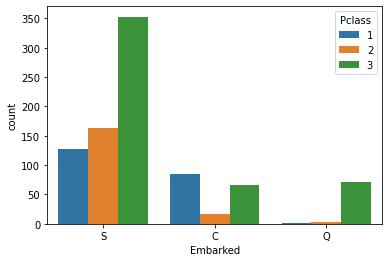

In [46]:
    #relating Embarked column with Pclass column
sns.countplot('Embarked',data=titanic_df,hue='Pclass')

In [52]:
#Who was alone and who was with sibilings/parents/children?

titanic_df['alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['alone'].loc[titanic_df['alone']>0] = 'Not Alone'
titanic_df['alone'].loc[titanic_df['alone']==0] = 'Alone'
titanic_df['alone'].head(10)

0    Not Alone
1    Not Alone
2        Alone
3    Not Alone
4        Alone
5        Alone
6        Alone
7    Not Alone
8    Not Alone
9    Not Alone
Name: alone, dtype: object

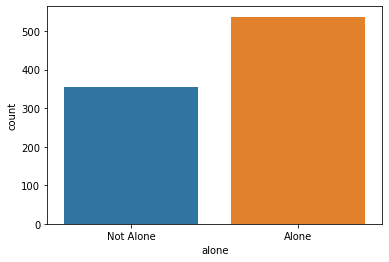

In [53]:
    #number of people that are alone vs with family
sns.countplot('alone',data=titanic_df)

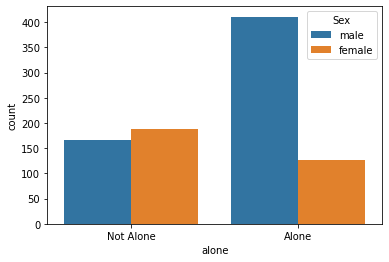

In [54]:
    #number of people that are alone vs with family, divided by sex
sns.countplot('alone',data=titanic_df,hue='Sex')

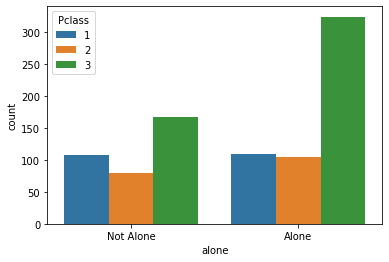

In [55]:
    #divided by class
sns.countplot('alone',data=titanic_df,hue='Pclass')

Now that we have describe the passengers on the Titanic in various factors, let's try to see if we can find any correlation between these factors and whether a passenger survived or died. In the following graphs, I will relate survival with the categories we have described above.

In [61]:
#Who survived and who died?

titanic_df['Survivor'] = titanic_df.Survived.map({0:'No',1:'Yes'})
titanic_df['Survivor'].head()

0     No
1    Yes
2    Yes
3    Yes
4     No
Name: Survivor, dtype: object

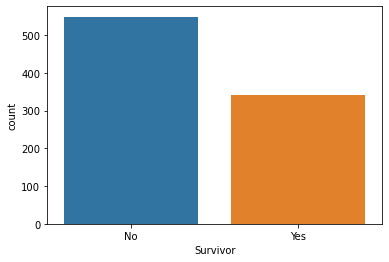

In [62]:
sns.countplot('Survivor',data=titanic_df)

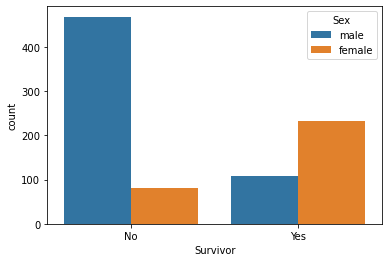

In [63]:
#survival rate relating to sex
sns.countplot('Survivor',data=titanic_df,hue='Sex')

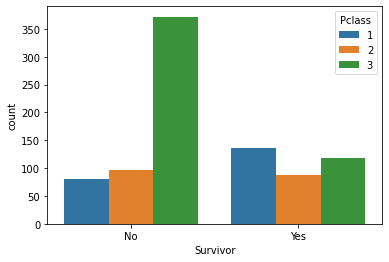

In [64]:
#survival rate relating to class
sns.countplot('Survivor',data=titanic_df,hue='Pclass')

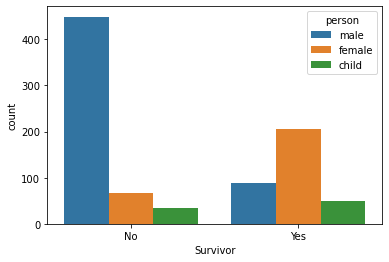

In [67]:
#relating to adult male, adult female, child classification
sns.countplot('Survivor',data=titanic_df,hue='person')

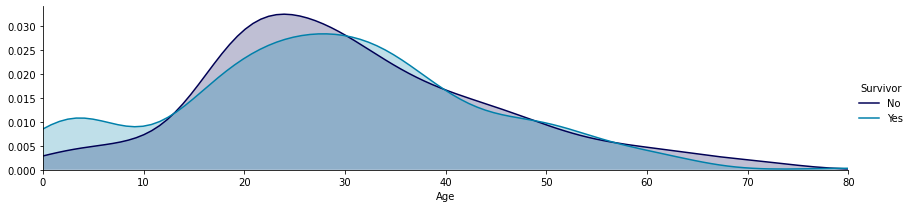

In [73]:
#relating to age
fig = sns.FacetGrid(titanic_df,hue='Survivor',aspect=4,palette='ocean')
fig.map(sns.kdeplot,'Age',shade=True)

fig.set(xlim=(0,titanic_df['Age'].max()))

fig.add_legend()

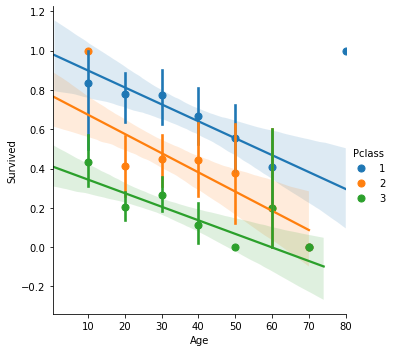

In [76]:
#survival rate relating to class and age
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=[10,20,30,40,50,60,70,80])

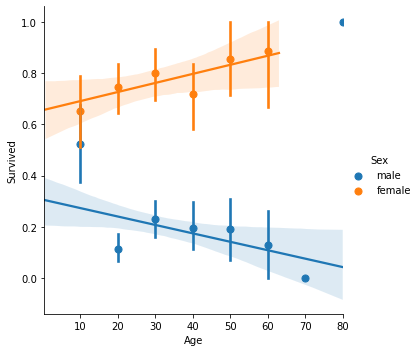

In [78]:
#survival rate relating to sex and age
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=[10,20,30,40,50,60,70,80])    

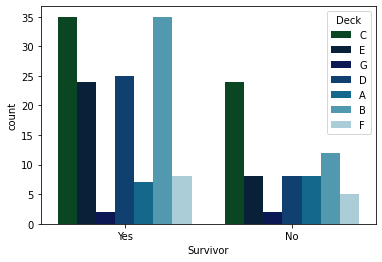

In [129]:
#survival rate relating to deck
decksurv_df = titanic_df[['Cabin','Survivor']].dropna()

levels = []
for level in decksurv_df['Cabin']:
        levels.append(level[0])

decksurv_df = DataFrame([levels,decksurv_df['Survivor']])
decksurv_df = decksurv_df.transpose()
decksurv_df.columns = ['Deck','Survivor']
decksurv_df = decksurv_df[decksurv_df.Deck != 'T']

sns.countplot('Survivor',data=decksurv_df,hue='Deck',palette='ocean')

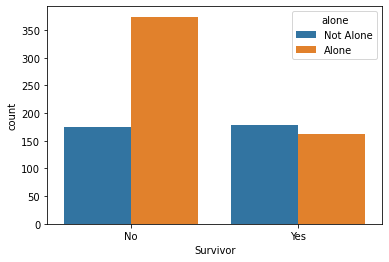

In [131]:
#survival rate relating to whether the person was alone or not
sns.countplot('Survivor',data=titanic_df,hue='alone')

Based on the above graphs, we can see a variety of factors that may have contributed (or may just be correlated) to a passenger's death/survival, and we can therefore make the following assumptions:

1) Men have a much higher death rate compared to women or children. We can hypothesize that this most likely is due to a "save women and children first" mentality.

2) Passengers that were in third class had a much higher death rate compared to second or first class passengers. This can be due to the location of the third class passengers on the ship, or due to the high percentage of male passengers in third class.

3) The survival rate is mostly similar to the death rate when compared over age, except for a smaller spike in survival rate for children.

4) The deck that passengers were stowed on most likely contributed to their survival, possibly due to the location of the decks on the boat.

5) Passengers that were alone were more likely to die, possibly due to the effort to save families first.